In [38]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance

Nsamples = 2000
# Generating a random dataset (you can replace this with your own dataset)
X, y = make_classification(n_samples=Nsamples, n_features=20, n_classes=2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# Evaluating the classifier
accuracy = np.trace(cm) / np.sum(cm)
print("Accuracy:", accuracy)

Confusion Matrix:
[[190  14]
 [ 12 184]]
Accuracy: 0.935


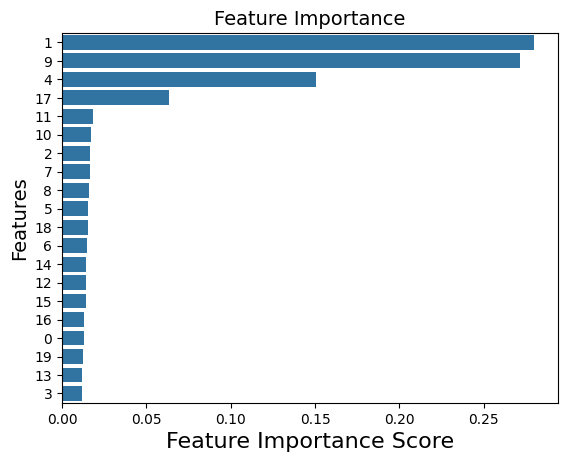

In [39]:
# Visualize Feature Importance
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
fig,ax = plt.subplots()
sns.barplot(x=feature_importance[sorted_idx], y=np.arange(len(sorted_idx)), orient='h', ax=ax)
ax.set_yticks(np.arange(len(sorted_idx)), sorted_idx)
ax.set_xlabel('Feature Importance Score',fontsize=16)
ax.set_ylabel('Features',fontsize=14)
ax.set_title('Feature Importance',fontsize=14)
fig.savefig('Pics/feature_importance.png')
plt.show()

In [40]:
feature_importance

array([0.01291599, 0.27999269, 0.01658218, 0.01157727, 0.15054909,
       0.01555601, 0.0150478 , 0.01637177, 0.01582075, 0.27170634,
       0.01723006, 0.01812296, 0.01401398, 0.01165928, 0.01404261,
       0.01398676, 0.01323008, 0.0636087 , 0.01551626, 0.01246943])

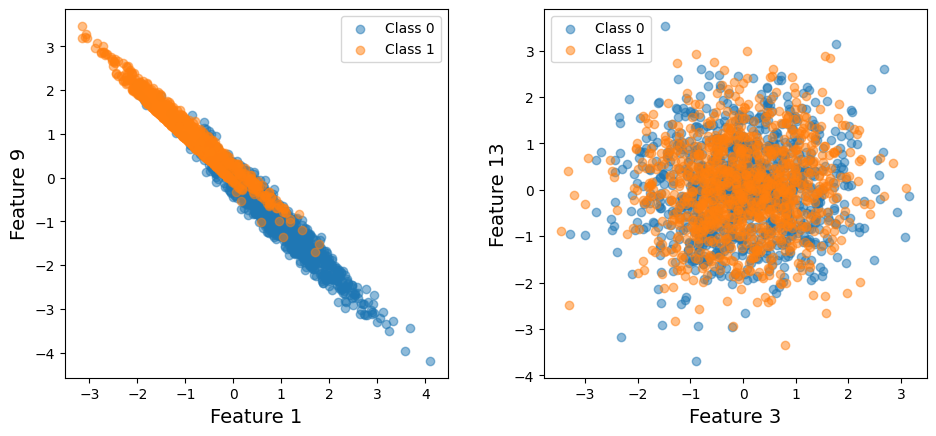

In [41]:
X0 = X[ y==0, :]
X1 = X[ y==1, :]

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].scatter(X0[:,1], X0[:, 9], label='Class 0', alpha=0.5)
ax[0].scatter(X1[:,1], X1[:, 9], label='Class 1', alpha=0.5)
ax[0].legend()
ax[0].set_xlabel('Feature 1', fontsize=14)
ax[0].set_ylabel('Feature 9', fontsize=14)
ax[1].scatter(X0[:,3], X0[:,13], label='Class 0', alpha=0.5)
ax[1].scatter(X1[:,3], X1[:,13], label='Class 1', alpha=0.5)
ax[1].legend()
ax[1].set_xlabel('Feature 3', fontsize=14)
ax[1].set_ylabel('Feature 13', fontsize=14)
fig.tight_layout(pad=3.0, w_pad=3.0)
fig.savefig('Pics/feature_scatter.png')
plt.show()

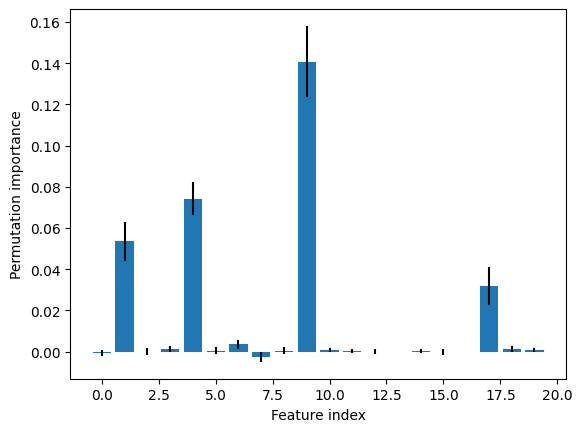

In [45]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std
plt.bar(range(X.shape[1]), importances, yerr=std)
plt.xlabel("Feature index")
plt.ylabel("Permutation importance")
plt.show()

In [47]:
std.shape

(20,)

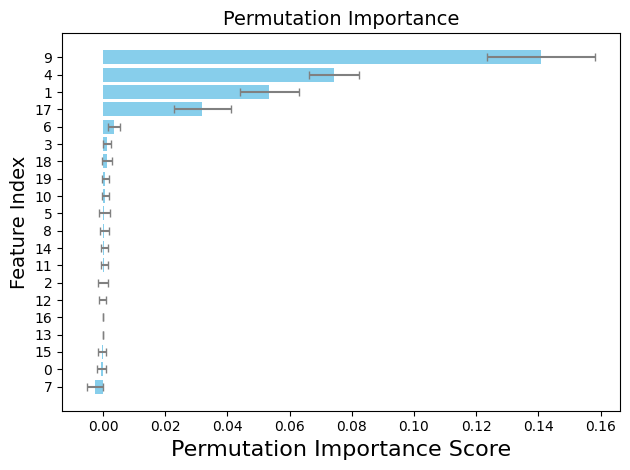

In [52]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std
sorted_idx = np.argsort(importances)[::-1]

fig, ax = plt.subplots()

# Sort importances and std
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
sorted_std = std[sorted_idx]

# Horizontal bar plot with error bars
ax.barh(np.arange(len(sorted_idx)), sorted_importances, xerr=sorted_std, align='center', color='skyblue', ecolor='gray', capsize=3)
ax.set_yticks(np.arange(len(sorted_idx)))
ax.set_yticklabels(sorted_idx)
ax.invert_yaxis()  # most important feature on top

ax.set_xlabel('Permutation Importance Score', fontsize=16)
ax.set_ylabel('Feature Index', fontsize=14)
ax.set_title('Permutation Importance', fontsize=14)
plt.tight_layout()
fig.savefig('Pics/permutation_importance.png')
plt.show()

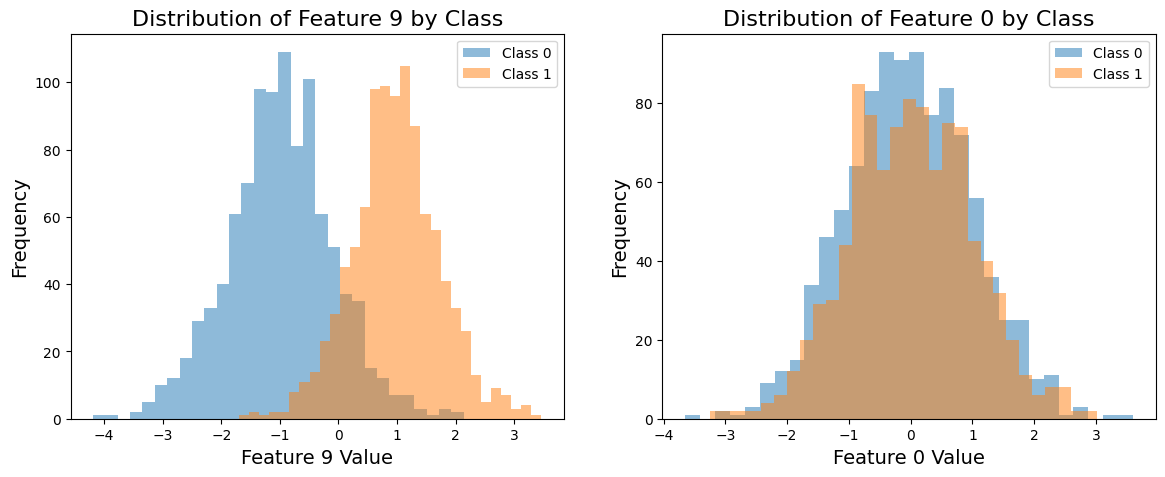

In [63]:
fig,ax = plt.subplots(ncols=2, figsize=(14,5))
indices = [9,0]
for i in range(2):
    ind = indices[i]
    Xsample = X[:, ind]
    Xsample_0 = Xsample[y==0]
    Xsample_1 = Xsample[y==1]
    ax[i].hist(Xsample_0, bins=30, alpha=0.5, label='Class 0')
    ax[i].hist(Xsample_1, bins=30, alpha=0.5, label='Class 1')
    ax[i].set_xlabel(f'Feature {ind} Value', fontsize=14)
    ax[i].set_ylabel('Frequency', fontsize=14)
    ax[i].set_title(f'Distribution of Feature {ind} by Class', fontsize=16)
    ax[i].legend()
fig.savefig('Pics/feature_value_distribution.png')
plt.show()

Feature  0: MI(model output) = 0.000
Feature  1: MI(model output) = 0.317
Feature  2: MI(model output) = 0.007
Feature  3: MI(model output) = 0.009
Feature  4: MI(model output) = 0.222
Feature  5: MI(model output) = 0.003
Feature  6: MI(model output) = 0.000
Feature  7: MI(model output) = 0.000
Feature  8: MI(model output) = 0.000
Feature  9: MI(model output) = 0.331
Feature 10: MI(model output) = 0.001
Feature 11: MI(model output) = 0.008
Feature 12: MI(model output) = 0.010
Feature 13: MI(model output) = 0.002
Feature 14: MI(model output) = 0.000
Feature 15: MI(model output) = 0.003
Feature 16: MI(model output) = 0.000
Feature 17: MI(model output) = 0.082
Feature 18: MI(model output) = 0.005
Feature 19: MI(model output) = 0.001


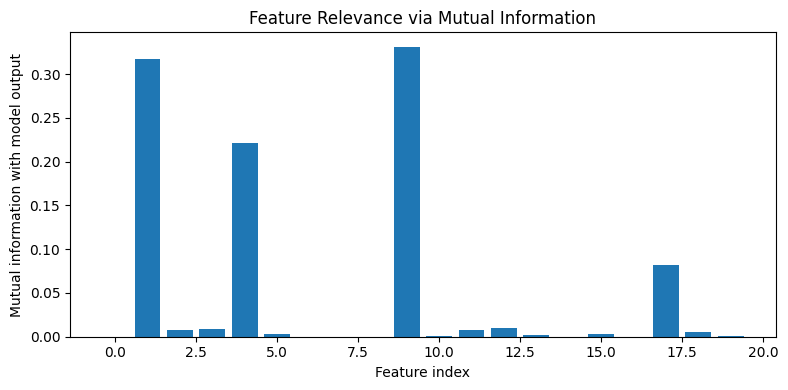

In [64]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

#y = clf.predict(X)   # use training or test set

mi_model = mutual_info_classif(X, y, random_state=42)

mi_model /= np.sum(mi_model)

for i, val in enumerate(mi_model):
    print(f"Feature {i:2d}: MI(model output) = {val:.3f}")

plt.figure(figsize=(8,4))
plt.bar(range(len(mi_model)), mi_model)
plt.xlabel("Feature index")
plt.ylabel("Mutual information with model output")
plt.title("Feature Relevance via Mutual Information")
plt.tight_layout()
plt.show()

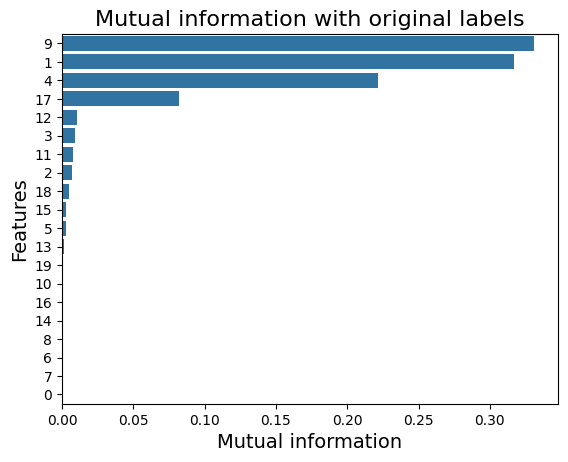

In [66]:
# Visualize Feature Importance
sorted_idx = np.argsort(mi_model)[::-1]
fig,ax = plt.subplots()
sns.barplot(x=mi_model[sorted_idx], y=np.arange(len(sorted_idx)), orient='h', ax=ax)
ax.set_yticks(np.arange(len(sorted_idx)), sorted_idx)
ax.set_xlabel('Mutual information',fontsize=14)
ax.set_ylabel('Features',fontsize=14)
ax.set_title('Mutual information with original labels',fontsize=16)
fig.savefig('Pics/mi_model.png')
plt.show()